# Assignment 5 Recommender System and NN with numpy

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('radio_songs.csv')

In [3]:
df.head()

,user,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = df.set_index('user')

In [5]:
df.head()

,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,all that remains,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
user,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1. Collaborative Filtering

Use this user-item matrix to:

A. Recommend 10 songs to users who have listened to 'u2' and 'pink floyd'. Use item-item collaborative filtering to find songs that are similar using spatial distance with cosine. Since this measures the distance you need to subtract from 1 to get similarity as shown below.

from scipy.spatial.distance import cosine

similarity = 1 - cosine(item1, item2).

In [8]:
# Binary matrix to be sure all values are 0 or 1
df = df.applymap(lambda x: 1 if x == 1 else 0)

# List of artists
artists = df.columns.tolist()

# Item vector transform to get the item-user matrix
item_vectors = df.T

# Similarity (1 - cosine distance)
def calculate_similarity(item1, item2):
    return 1 - cosine(item1, item2)


/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_25164/3259021008.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x == 1 else 0)


In [9]:
def part_a_recommendations():
    
    # Getting the u2 and pink floyd vectors
    u2_vector = item_vectors.loc['u2']
    pink_floyd_vector = item_vectors.loc['pink floyd']
    
    # Similarities to u2
    u2_similarities = []
    for artist in item_vectors.index:
        if artist != 'u2':
            similarity = calculate_similarity(u2_vector, item_vectors.loc[artist])
            u2_similarities.append((artist, similarity))
    
    # Sorting by similarity
    u2_similarities.sort(key=lambda x: x[1], reverse=True)
    print("Top 10 artists similar to U2:")
    for i, (artist, similarity) in enumerate(u2_similarities[:10], 1):
        print(f"{i}. {artist}: {similarity:.4f}")
    
    # Similarities to Pink Floyd
    pf_similarities = []
    for artist in item_vectors.index:
        if artist != 'pink floyd':
            similarity = calculate_similarity(pink_floyd_vector, item_vectors.loc[artist])
            pf_similarities.append((artist, similarity))
    
    # Sorting by similarity
    pf_similarities.sort(key=lambda x: x[1], reverse=True)
    print("\nTop 10 artists similar to Pink Floyd:")
    for i, (artist, similarity) in enumerate(pf_similarities[:10], 1):
        print(f"{i}. {artist}: {similarity:.4f}")
    
    # Combined similarities
    combined_similarities = []
    for artist in item_vectors.index:
        if artist != 'u2' and artist != 'pink floyd':
            u2_sim = calculate_similarity(u2_vector, item_vectors.loc[artist])
            pf_sim = calculate_similarity(pink_floyd_vector, item_vectors.loc[artist])
            avg_sim = (u2_sim + pf_sim) / 2
            combined_similarities.append((artist, avg_sim))
    
    # Sorting by similarity
    combined_similarities.sort(key=lambda x: x[1], reverse=True)
    print("\nTop 10 recommendations for users who like U2 and Pink Floyd:")
    for i, (artist, similarity) in enumerate(combined_similarities[:10], 1):
        print(f"{i}. {artist}: {similarity:.4f}")
        
    return combined_similarities

In [13]:
combined_similarities = part_a_recommendations()

combined_similarities

Top 10 artists similar to U2:
1. ac/dc: 0.2236
2. audioslave: 0.2236
3. amy winehouse: 0.2041
4. cascada: 0.1890
5. bloodhound gang: 0.1667
6. beatsteaks: 0.1508
7. abba: 0.0000
8. adam green: 0.0000
9. aerosmith: 0.0000
10. afi: 0.0000

Top 10 artists similar to Pink Floyd:
1. the rolling stones: 0.3333
2. atreyu: 0.2887
3. audioslave: 0.2582
4. beastie boys: 0.2357
5. abba: 0.0000
6. ac/dc: 0.0000
7. adam green: 0.0000
8. aerosmith: 0.0000
9. afi: 0.0000
10. air: 0.0000

Top 10 recommendations for users who like U2 and Pink Floyd:
1. audioslave: 0.2409
2. coldplay: 0.1741
3. bob dylan: 0.1667
4. bob marley & the wailers: 0.1443
5. crystal castles: nan
6. david bowie: 0.2041
7. atreyu: 0.1443
8. dark tranquillity: 0.1443
9. beastie boys: 0.1179
10. ac/dc: 0.1118


[('audioslave', 0.24090284374857002),
 ('coldplay', 0.17407765595569785),
 ('bob dylan', 0.16666666666666663),
 ('bob marley & the wailers', 0.14433756729740643),
 ('crystal castles', nan),
 ('david bowie', 0.20412414523193156),
 ('atreyu', 0.14433756729740643),
 ('dark tranquillity', 0.14433756729740643),
 ('beastie boys', 0.11785113019775795),
 ('ac/dc', 0.11180339887498947),
 ('amy winehouse', 0.10206207261596578),
 ('bloc party', 0.09622504486493766),
 ('cascada', 0.09449111825230683),
 ('bloodhound gang', 0.08333333333333331),
 ('beatsteaks', 0.07537783614444094),
 ('daft punk', 0.07537783614444094),
 ('clueso', 0.06063390625908327),
 ('abba', 0.0),
 ('adam green', 0.0),
 ('aerosmith', 0.0),
 ('afi', 0.0),
 ('air', 0.0),
 ('alanis morissette', 0.0),
 ('alexisonfire', 0.0),
 ('alicia keys', 0.0),
 ('all that remains', 0.0),
 ('amon amarth', 0.0),
 ('amy macdonald', 0.0),
 ('anti-flag', 0.0),
 ('aphex twin', 0.0),
 ('apocalyptica', 0.0),
 ('arcade fire', 0.0),
 ('arch enemy', 0.0),


B. Find user most similar to user 1606. Use user-user collaborative filtering with cosine similarity. List the recommended songs for user 1606 (Hint: find the songs listened to by the most similar user).

In [14]:
def part_b_similar_user():
    # Checking if user 1606 exists
    if 1606 not in df.index:
        print("User 1606 not found!")
        return None, None, None, None
    
    # User's 1606 vector
    user1606_vector = df.loc[1606]
    
    # Similarities between user 1606 and all others
    user_similarities = []
    for user_id in df.index:
        if user_id != 1606:
            similarity = calculate_similarity(user1606_vector, df.loc[user_id])
            user_similarities.append((user_id, similarity))
    
    # Sorting by similarity
    user_similarities.sort(key=lambda x: x[1], reverse=True)
    print("Top 5 users most similar to user 1606:")
    for i, (user_id, similarity) in enumerate(user_similarities[:5], 1):
        print(f"{i}. User {user_id}: {similarity:.4f}")
    
    # Getting the most similar user
    most_similar_user_id, highest_similarity = user_similarities[0]
    print(f"\nMost similar user: User {most_similar_user_id} (similarity: {highest_similarity:.4f})")
    
    # Songs that the most similar user has listened to
    most_similar_user_vector = df.loc[most_similar_user_id]
    songs_listened_by_similar_user = most_similar_user_vector[most_similar_user_vector == 1].index.tolist()
    
    # Songs that user 1606 has listened to
    songs_listened_by_1606 = user1606_vector[user1606_vector == 1].index.tolist()
    
    # Songs that the most similar user has listened to but user 1606 hasn't
    recommended_songs = [song for song in songs_listened_by_similar_user if song not in songs_listened_by_1606]
    
    print("\nRecommended songs for user 1606 from most similar user:")
    for i, song in enumerate(recommended_songs, 1):
        print(f"{i}. {song}")
        
    return user_similarities, most_similar_user_id, songs_listened_by_similar_user, songs_listened_by_1606


Top 5 users most similar to user 1606:
1. User 1144: 0.2774
2. User 144: 0.2236
3. User 543: 0.0000
4. User 691: 0.0000
5. User 792: nan

Most similar user: User 1144 (similarity: 0.2774)

Recommended songs for user 1606 from most similar user:
1. beastie boys
2. bob dylan
3. bob marley & the wailers
4. david bowie
5. eric clapton
6. johnny cash
7. pearl jam
8. pink floyd
9. the doors
10. the rolling stones
11. tom waits


/opt/anaconda3/lib/python3.12/site-packages/scipy/spatial/distance.py:647: RuntimeWarning: invalid value encountered in divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


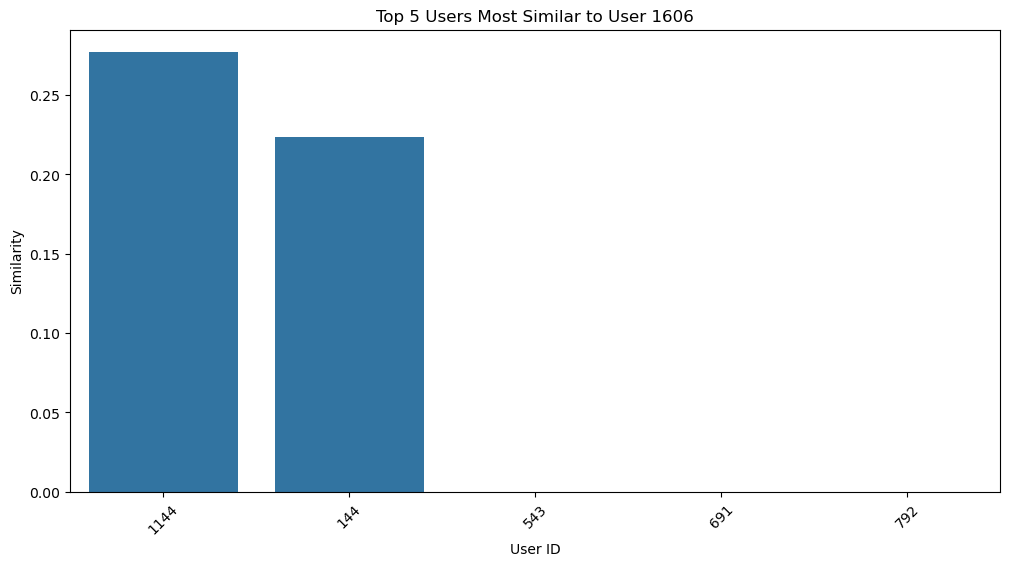

In [22]:
#Results
user_similarities, most_similar_user_id, songs_listened_by_similar_user, songs_listened_by_1606 = part_b_similar_user()
user_similarities
most_similar_user_id
songs_listened_by_similar_user
songs_listened_by_1606


# Similarities
def plot_similarities(user_similarities):
    # Take only the top 5 users
    top_5_users = user_similarities[:5]
    user_ids = [str(user[0]) for user in top_5_users]  # Convert user IDs to strings
    similarities = [user[1] for user in top_5_users]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=user_ids, y=similarities)
    plt.xticks(rotation=45)
    plt.xlabel('User ID')
    plt.ylabel('Similarity')
    plt.title('Top 5 Users Most Similar to User 1606')
    plt.show()

plot_similarities(user_similarities)

C. How many of the recommended songs has already been listened to by user 1606?

D. Use a combination of user-item approach to build a recommendation score for each song for each user using the following steps for each user-

1. For each song for the user row, get the top 10 similar songs and their similarity score.
2. For each of the top 10 similar songs, get a list of the user purchases.
3. Calculate a recommendation score as follows: sum(purchasehistory*similarityscore)/ sum(similarityscore).
4. What are the top 5 song recommendations for user 1606?

## 2. Conceptual questions

1. Name 2 other similarity measures that you can use instead of cosine similarity above.

2. What is needed to build a Content-Based Recommender system?

3. Name 2 methods to evaluate your recommender system.